<a href="https://colab.research.google.com/github/sanjaymahto1192/Pneumonia_prediction_CNN/blob/main/Pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount the google drive on kaggles

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Set the enviroment and get files

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command
%pwd

/content/gdrive/My Drive/Kaggle


'/content/gdrive/My Drive/Kaggle'

In [ ]:
#!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [4]:
!ls

chest_xray  kaggle.json


In [ ]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

In [ ]:
!ls

chest_xray  kaggle.json


In [5]:
!cd chest_xray

In [6]:
!ls

chest_xray  kaggle.json


In [7]:
!pwd

/content/gdrive/My Drive/Kaggle


In [8]:
%cd /content/gdrive/My Drive/Kaggle/chest_xray

/content/gdrive/My Drive/Kaggle/chest_xray


In [9]:
!pwd

/content/gdrive/My Drive/Kaggle/chest_xray


In [10]:
!ls

chest_xray  __MACOSX  test  train  val


display all the files in the input directory

In [11]:
import numpy as np 
import pandas as pd 

# Input data files are available in the "../input/" directory.

import os
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Kaggle/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/IM-0719-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/IM-0710-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/IM-0701-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/IM-0735-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/IM-0738-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/IM-0716-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/IM-0722-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/IM-0714-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/IM-0715-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/NORMAL2-IM-0404-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/NORMAL2-IM-0383-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest_xray/train/NORMAL/NORMAL2-IM-0392-0001.jpeg
/content/gdrive/My Drive/Kaggle/chest

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

Preprocessing of data

In [14]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [15]:
train = get_training_data('/content/gdrive/My Drive/Kaggle/chest_xray/chest_xray/train')
test = get_training_data('/content/gdrive/My Drive/Kaggle/chest_xray/chest_xray/test')
val = get_training_data('/content/gdrive/My Drive/Kaggle/chest_xray/chest_xray/val')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



Visualising the type of data

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


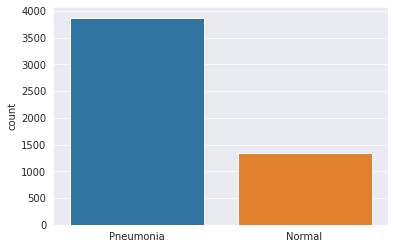

In [16]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)    

Text(0.5, 1.0, 'NORMAL')

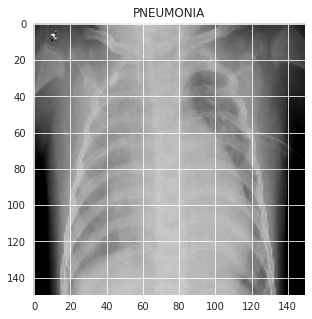

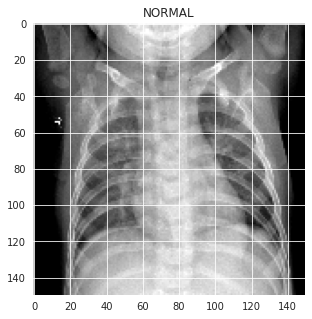

In [17]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

Data prepration for the model

In [18]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [19]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [20]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [21]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [36]:
# Importing Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

Creating a CNN model

In [33]:
model = Sequential()
#Convolution
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))

#Normalization
model.add(BatchNormalization())

#Pooling
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#Convolution
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

model.add(Dropout(0.1))
#Normalization
model.add(BatchNormalization())

#Pooling
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#Convolution
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

#Normalization
model.add(BatchNormalization())

#Pooling
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

#Pooling
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 38, 64)       

Model Training 

In [38]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val),validation_steps = 624)

Epoch 1/12
163/163 [==============================] - 10s 62ms/step - loss: 0.1648 - accuracy: 0.9471 - val_loss: 0.7559 - val_accuracy: 0.5625
Epoch 2/12
163/163 [==============================] - 10s 61ms/step - loss: 0.1707 - accuracy: 0.9394
Epoch 3/12
163/163 [==============================] - 10s 62ms/step - loss: 0.1617 - accuracy: 0.9446
Epoch 4/12
163/163 [==============================] - 10s 62ms/step - loss: 0.1610 - accuracy: 0.9482
Epoch 5/12
163/163 [==============================] - 10s 61ms/step - loss: 0.1682 - accuracy: 0.9433
Epoch 6/12
163/163 [==============================] - 10s 61ms/step - loss: 0.1511 - accuracy: 0.9433
Epoch 7/12
163/163 [==============================] - 10s 61ms/step - loss: 0.1563 - accuracy: 0.9465
Epoch 8/12
163/163 [==============================] - 10s 61ms/step - loss: 0.1475 - accuracy: 0.9482
Epoch 9/12
163/163 [==============================] - 10s 61ms/step - loss: 0.1510 - accuracy: 0.9511
Epoch 10/12
163/163 [===================

<h1> Accuracy = 75% 

In [39]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 11ms/step - loss: 0.6138 - accuracy: 0.7500
Loss of the model is -  0.6138153672218323
20/20 [==============================] - 0s 11ms/step - loss: 0.6138 - accuracy: 0.7500
Accuracy of the model is -  75.0 %


Prediction

In [52]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

Accuracy Matrix

In [53]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.97      0.62      0.76       390
   Normal (Class 1)       0.60      0.97      0.74       234

           accuracy                           0.75       624
          macro avg       0.79      0.79      0.75       624
       weighted avg       0.83      0.75      0.75       624



In [54]:
cm = confusion_matrix(y_test,predictions)
cm

array([[241, 149],
       [  7, 227]])

In [55]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

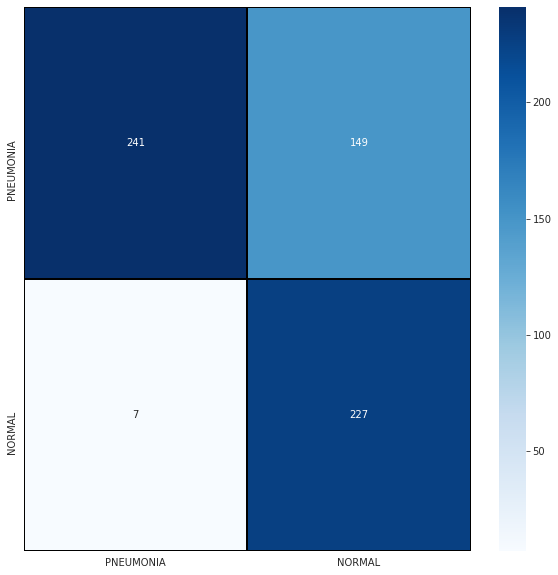

In [56]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)